In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("Minor_data_1.csv")

# Data preprocessing

In [3]:
df.sample(10)

,YEARS,RAINFALL_DENSITY(mm),Extra_Supply_of_Water_is_used_not
136,2021,"1,236",Yes
59,2022,"1,257",Yes
110,2021,"1,236",Yes
63,2022,"1,257",No
24,2023,76.9,Yes
104,2021,"1,236",No
94,2022,"1,257",Yes
82,2022,"1,257",Yes
60,2022,"1,257",Yes
78,2022,"1,257",Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   YEARS                              148 non-null    int64 
 1   RAINFALL_DENSITY(mm)               148 non-null    object
 2   Extra_Supply_of_Water_is_used_not  148 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.6+ KB


In [5]:
df.describe()

,YEARS
count,148.000000
mean,2021.993243
std,0.820624
min,2021.000000
25%,2021.000000
50%,2022.000000
75%,2023.000000
max,2023.000000


In [6]:
df.shape

(148, 3)

# Encoding

In [7]:
from sklearn import preprocessing 

In [8]:
my_label = preprocessing.LabelEncoder()   
df['Extra_Supply_of_Water_is_used_not']= my_label.fit_transform(df['Extra_Supply_of_Water_is_used_not'])   
print(df['Extra_Supply_of_Water_is_used_not' ].unique())  
df['RAINFALL_DENSITY(mm)']=my_label.fit_transform(df['RAINFALL_DENSITY(mm)'])
print(df['RAINFALL_DENSITY(mm)'].unique())

[1 0]
[2 1 0]


In [9]:
df

,YEARS,RAINFALL_DENSITY(mm),Extra_Supply_of_Water_is_used_not
0,2023,2,1
1,2023,2,1
2,2023,2,1
3,2023,2,0
4,2023,2,1
...,...,...,...
143,2021,0,0
144,2021,0,0
145,2021,0,0
146,2021,0,1


In [10]:
x = df.drop(columns=['Extra_Supply_of_Water_is_used_not'])
y = df['Extra_Supply_of_Water_is_used_not']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.20,train_size=0.80, random_state=42)

In [12]:
X_train

,YEARS,RAINFALL_DENSITY(mm)
136,2021,0
45,2023,2
119,2021,0
27,2023,2
4,2023,2
...,...,...
71,2022,1
106,2021,0
14,2023,2
92,2022,1


In [13]:
y_train

136    1
45     1
119    1
27     1
4      1
      ..
71     1
106    1
14     1
92     1
102    0
Name: Extra_Supply_of_Water_is_used_not, Length: 118, dtype: int32

# Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [15]:
lr.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_pred = lr.predict(X_train)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
cm = metrics.confusion_matrix(y_train,lr.predict(X_train))
cm

array([[ 0, 25],
       [ 0, 93]], dtype=int64)

In [18]:
cm = metrics.confusion_matrix(y_train,lr.predict(X_train))
cm

array([[ 0, 25],
       [ 0, 93]], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
y_pred= lr.predict(X_train)
accuracy= accuracy_score(y_train,y_pred)
print("Accuracy of training dataset:",accuracy*100)

Accuracy of training dataset: 78.8135593220339


In [20]:
from sklearn.metrics import precision_score, recall_score

In [21]:
precision=precision_score(y_train,y_pred)
print("Precision_Score :", precision*100)

Precision_Score : 78.8135593220339


# SVM Model

In [22]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [23]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.7333333333333333 

[[ 0  8]
 [ 0 22]]


In [25]:
#linear
model_linear = SVC(kernel='linear')

In [26]:
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
y_pred = model_linear.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.7333333333333333 

[[ 0  8]
 [ 0 22]]


# linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [30]:
LR.fit(X_train,y_train)

LinearRegression()

In [31]:
LR.score(X_train,y_train)

0.008590471206172623

In [32]:
predict  = LR.predict(X_test)
predict

array([0.83349609, 0.78710938, 0.83349609, 0.74121094, 0.83349609,
       0.74121094, 0.78710938, 0.74121094, 0.78710938, 0.74121094,
       0.74121094, 0.78710938, 0.83349609, 0.78710938, 0.83349609,
       0.78710938, 0.74121094, 0.78710938, 0.83349609, 0.74121094,
       0.74121094, 0.83349609, 0.74121094, 0.83349609, 0.78710938,
       0.74121094, 0.78710938, 0.83349609, 0.78710938, 0.74121094])

In [33]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.7333333333333333 

[[ 0  8]
 [ 0 22]]


# plot accuracy of different Algorithms

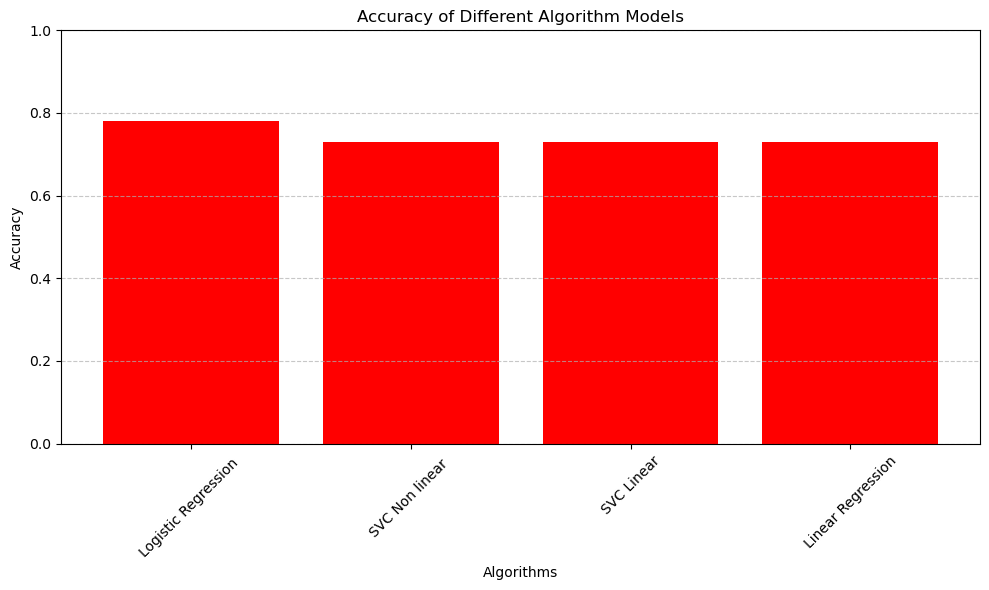

In [35]:
accuracies = [0.78, 0.73, 0.73, 0.73]
algorithms = ['Logistic Regression ', 'SVC Non linear ', 'SVC Linear', 'Linear Regression']

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color='Red')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithm Models')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()